In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("/kaggle/input/cryptojacking/Train.csv")
test = pd.read_csv("/kaggle/input/cryptojacking/Test.csv")
sample = pd.read_csv("/kaggle/input/cryptojacking/SampleSubmission.csv")


In [3]:
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [4]:
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [5]:
train.shape, test.shape

((8908, 16), (3818, 15))

# EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [7]:
train.describe()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
mean,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000
max,1795.316255,4.677280e+06,51.000000,25.246148,1064.819285,831.503948,98097.784300,4.812144e+06,1118.878021,3183.701036,475.031124,2.955622,98031.408630,46.784800,1.000000


<AxesSubplot:>

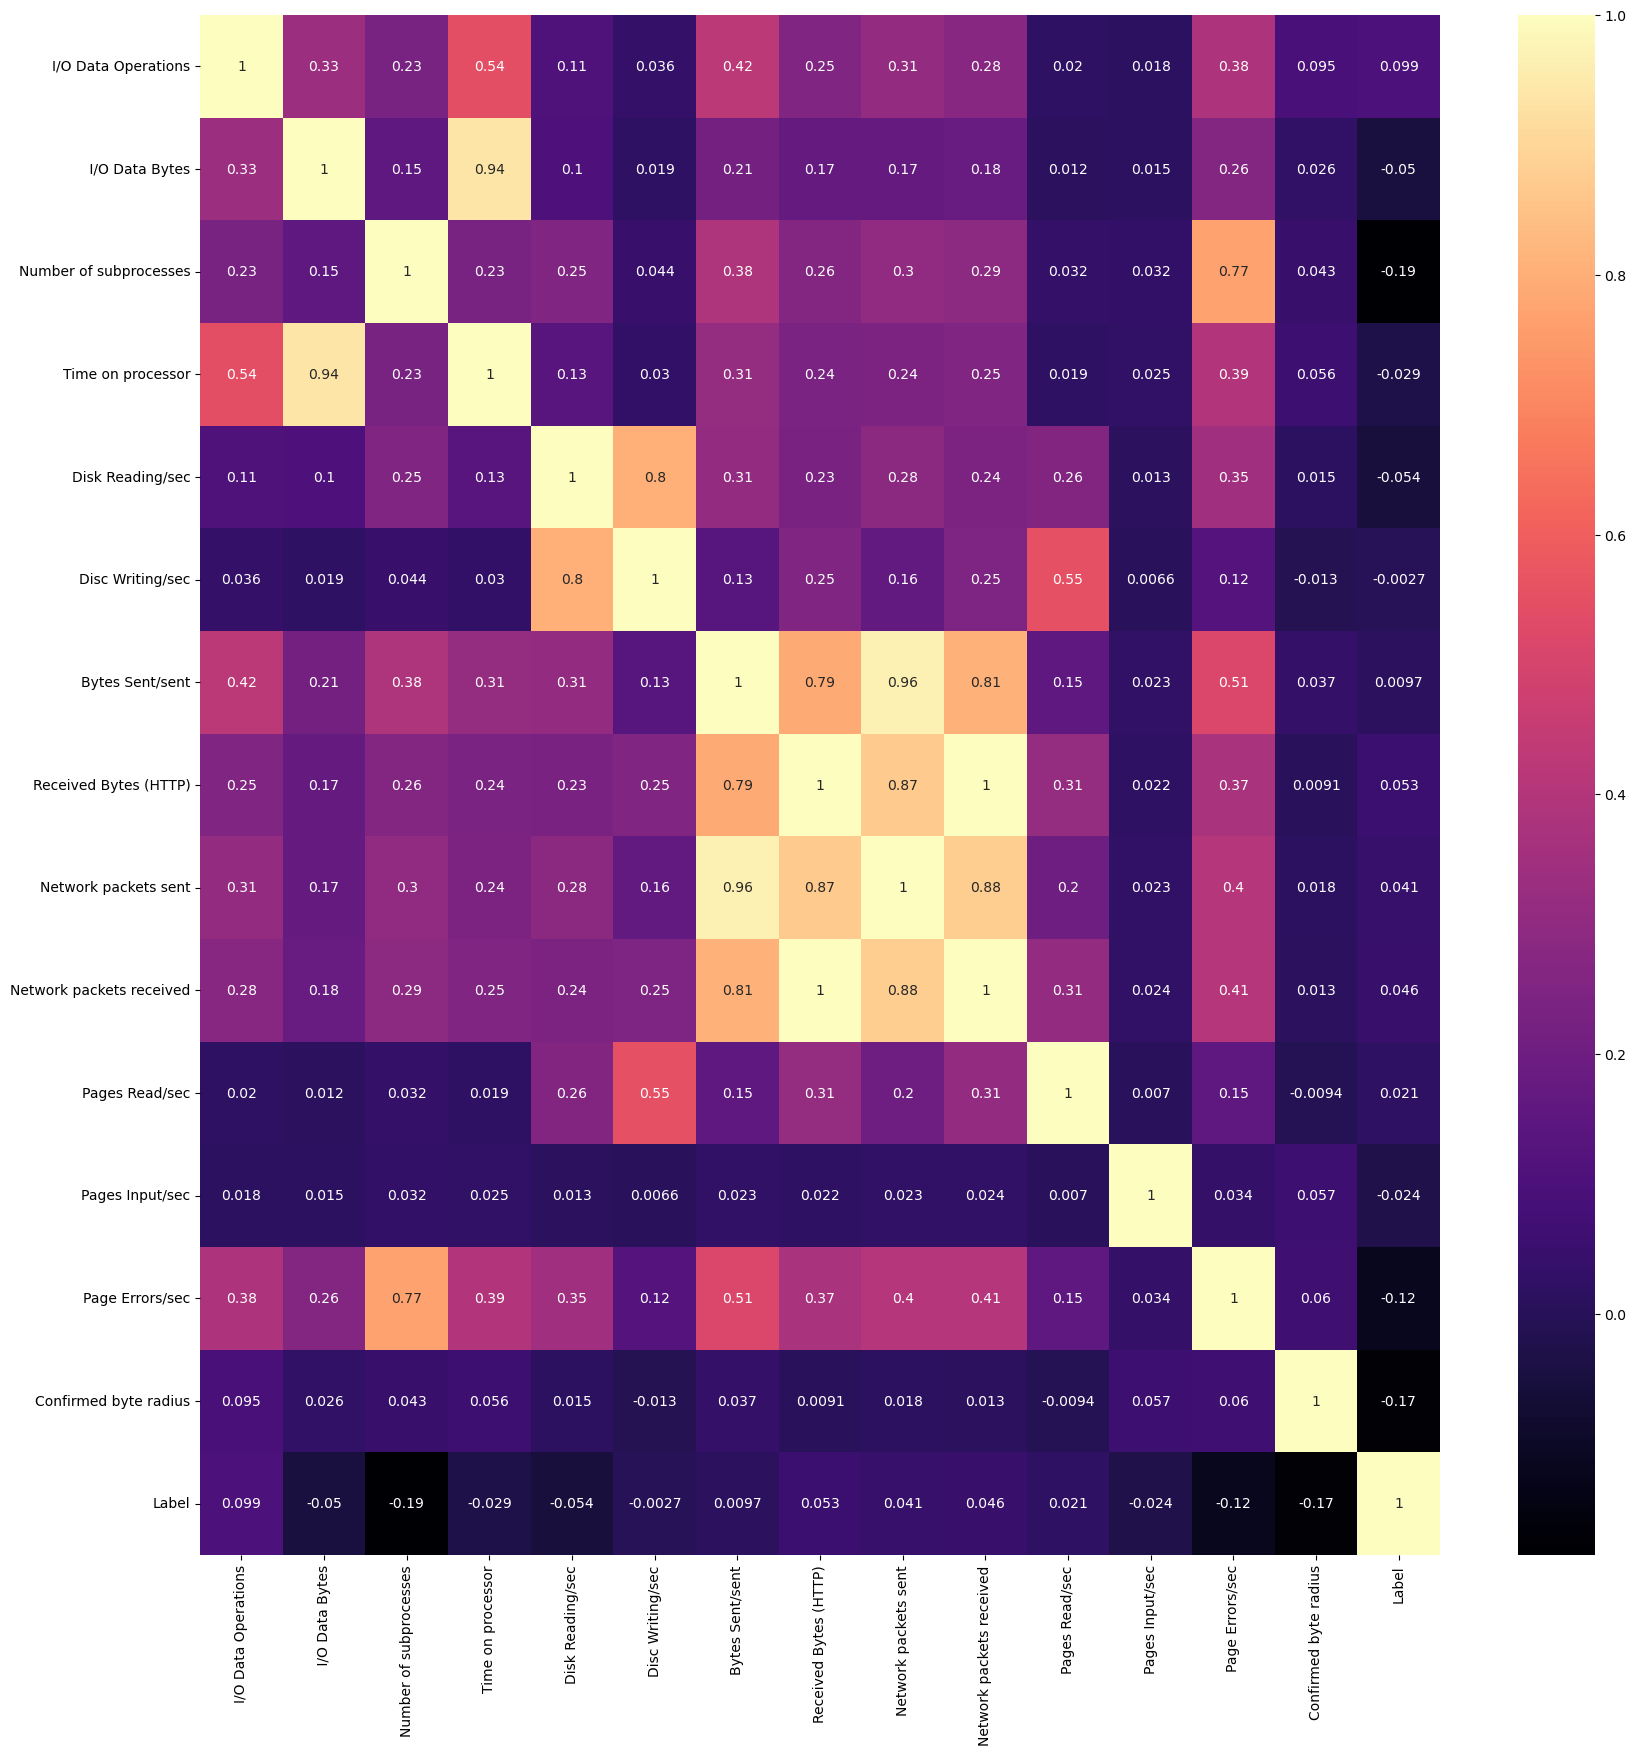

In [8]:
# Correlation matrix
corr = train.select_dtypes(include = "number").corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='magma')

<AxesSubplot:>

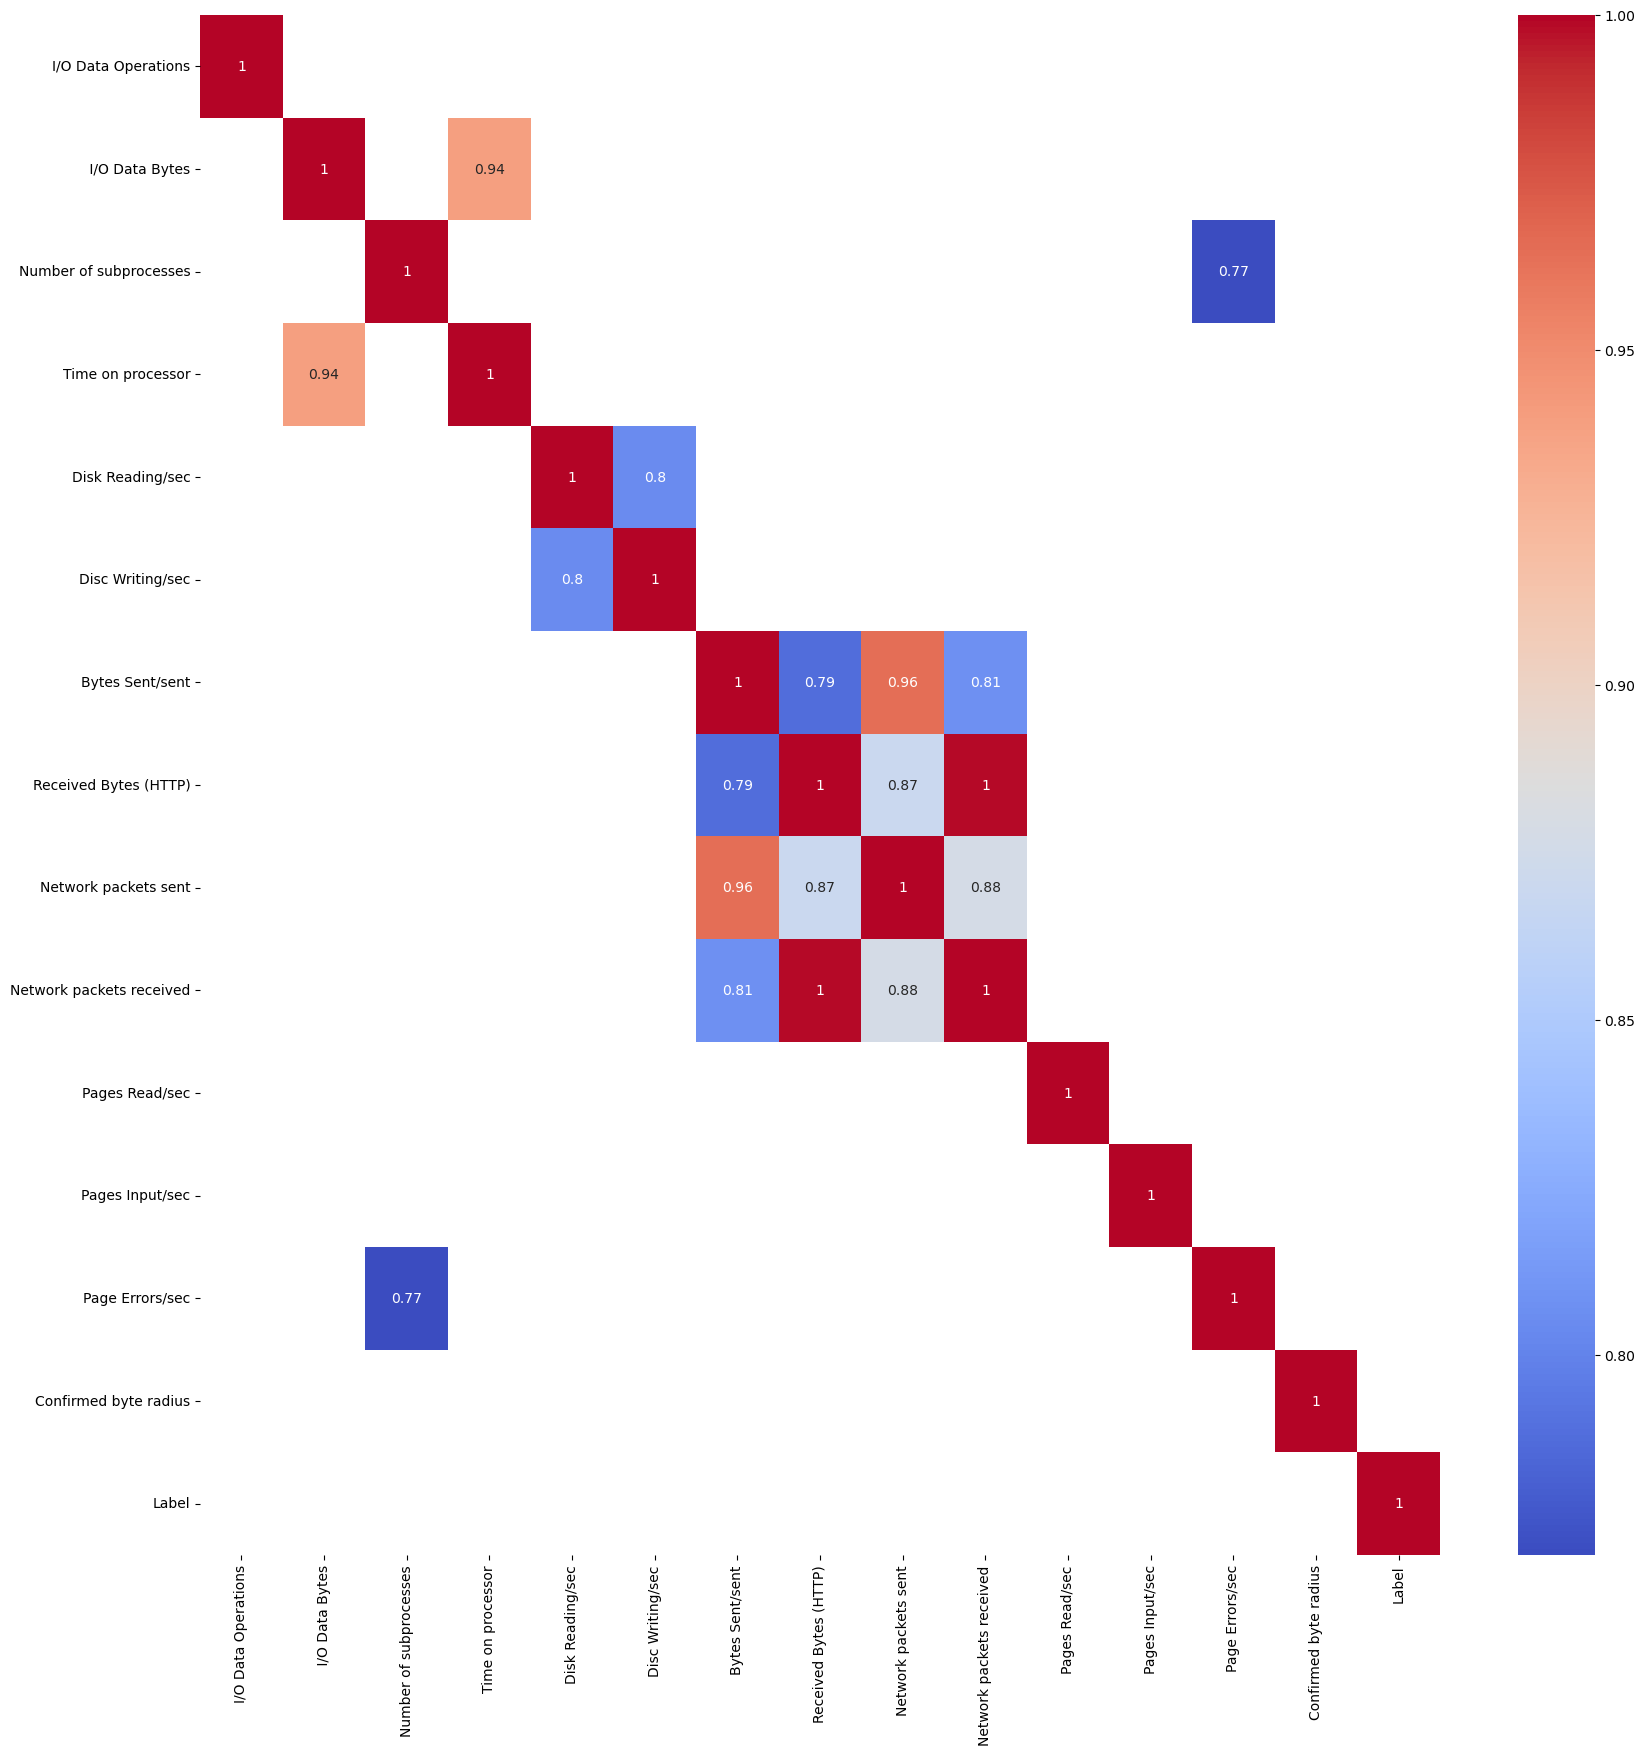

In [9]:
# Check for features with high correlation of over 0.6
corr[corr > 0.6]

# Plot
plt.figure(figsize=(20,20))
sns.heatmap(corr[corr > 0.6], annot=True, cmap='coolwarm')


In [10]:
relevant_features = corr[corr > 0.6].index

# Drop Label from list
relevant_features = relevant_features.drop("Label")
relevant_features

Index(['I/O Data Operations', ' I/O Data Bytes', 'Number of subprocesses',
       'Time on processor', 'Disk Reading/sec', 'Disc Writing/sec',
       'Bytes Sent/sent', 'Received Bytes (HTTP)', 'Network packets sent',
       'Network packets received', 'Pages Read/sec', 'Pages Input/sec',
       'Page Errors/sec', 'Confirmed byte radius'],
      dtype='object')

<AxesSubplot:>

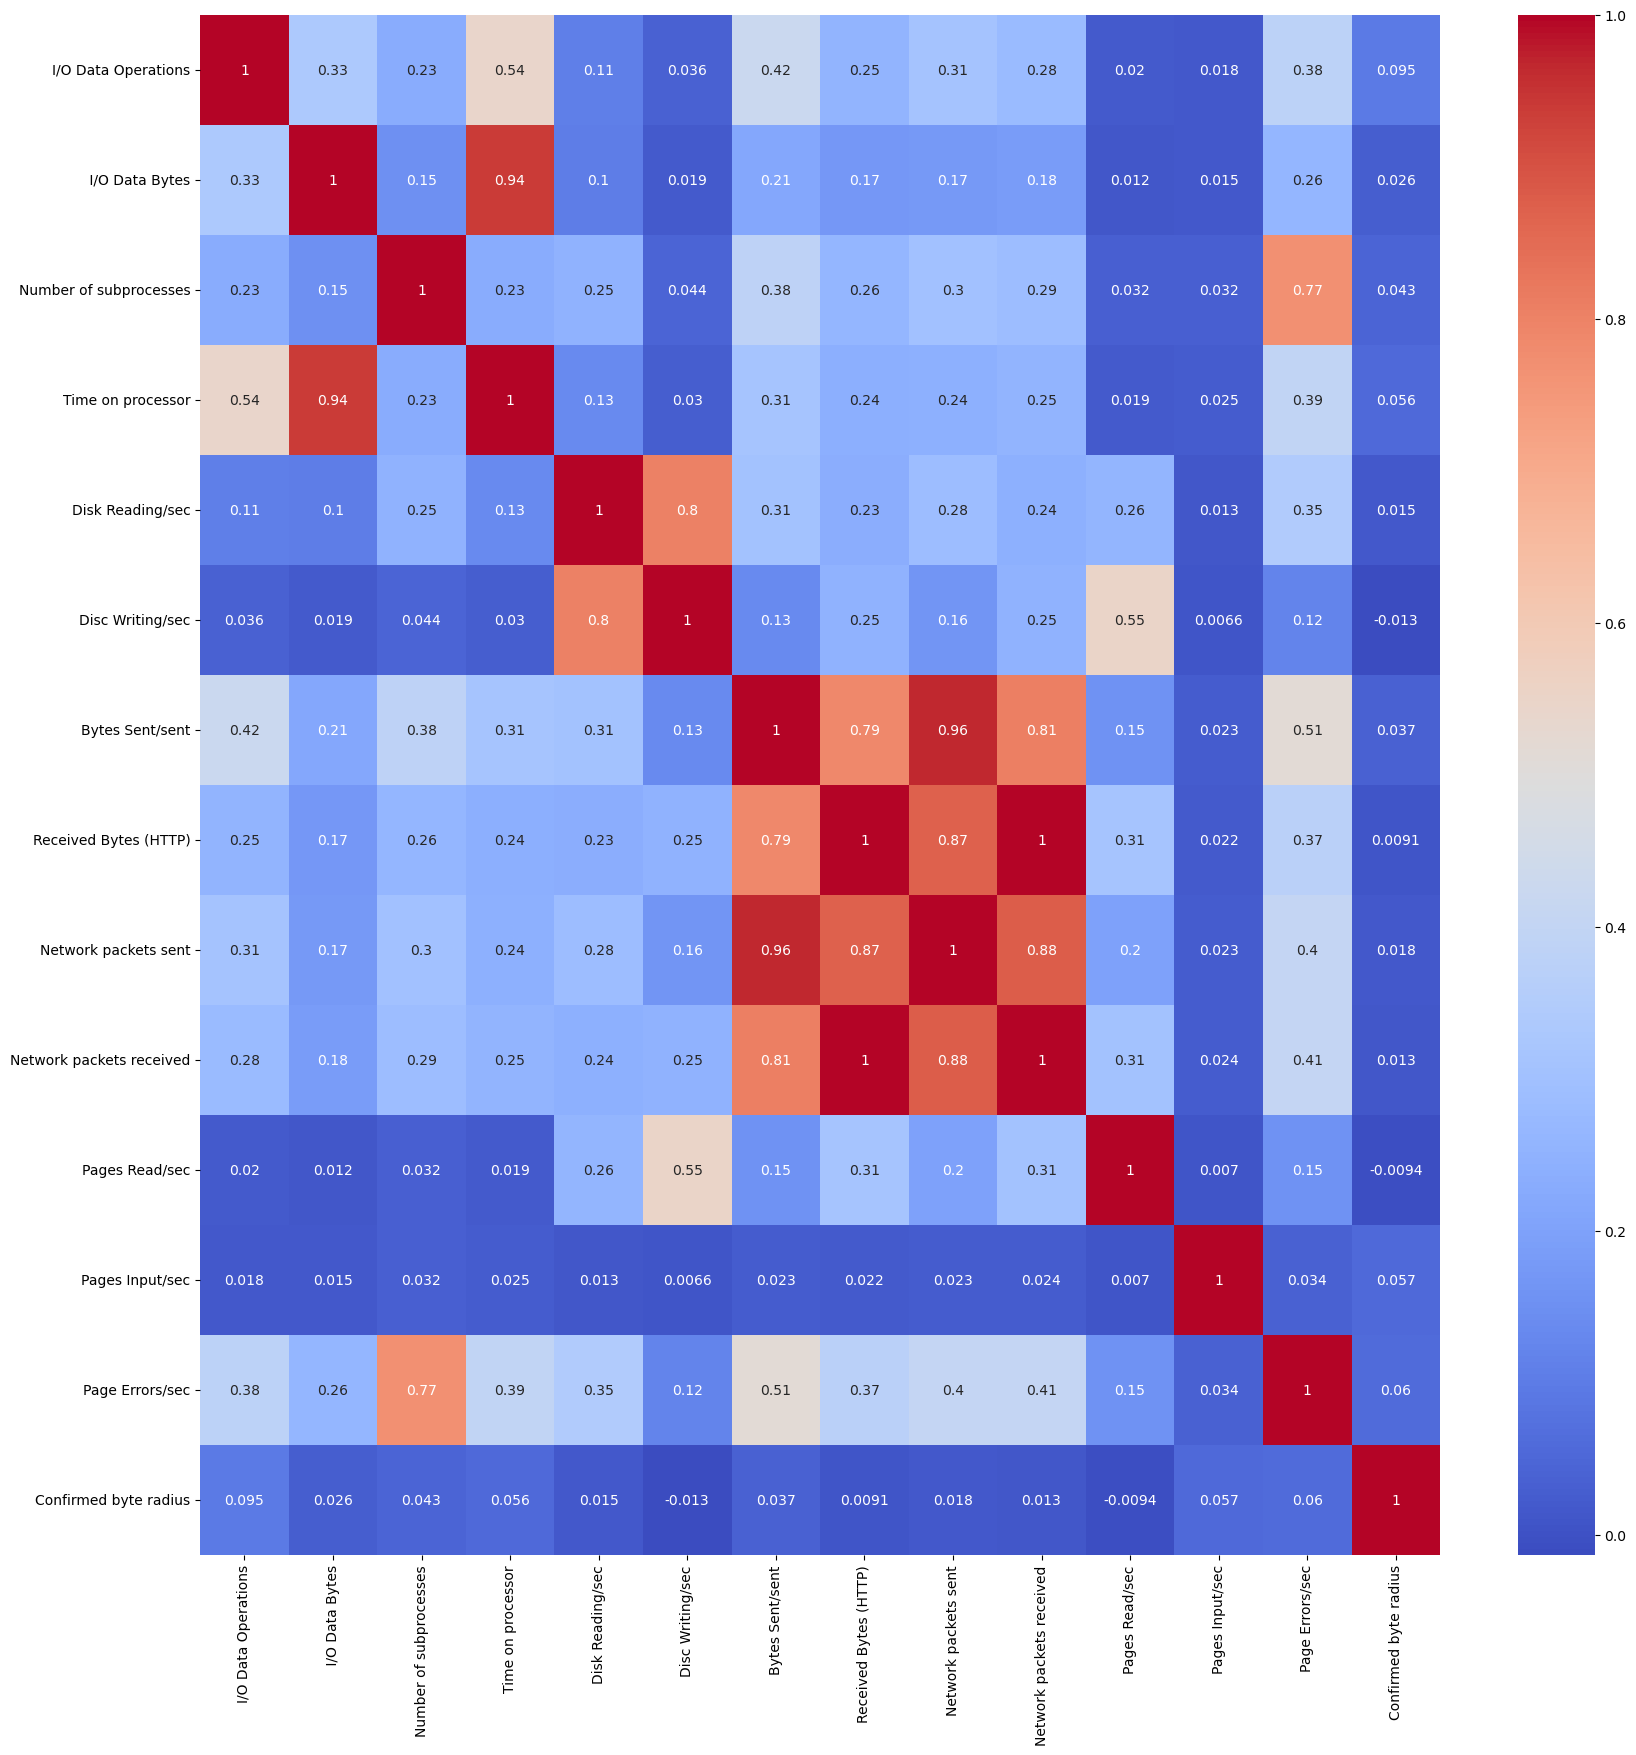

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(train[relevant_features].corr(), annot=True, cmap='coolwarm')

In [12]:
# Pairplot
#sns.pairplot(train, diag_kind='kde')

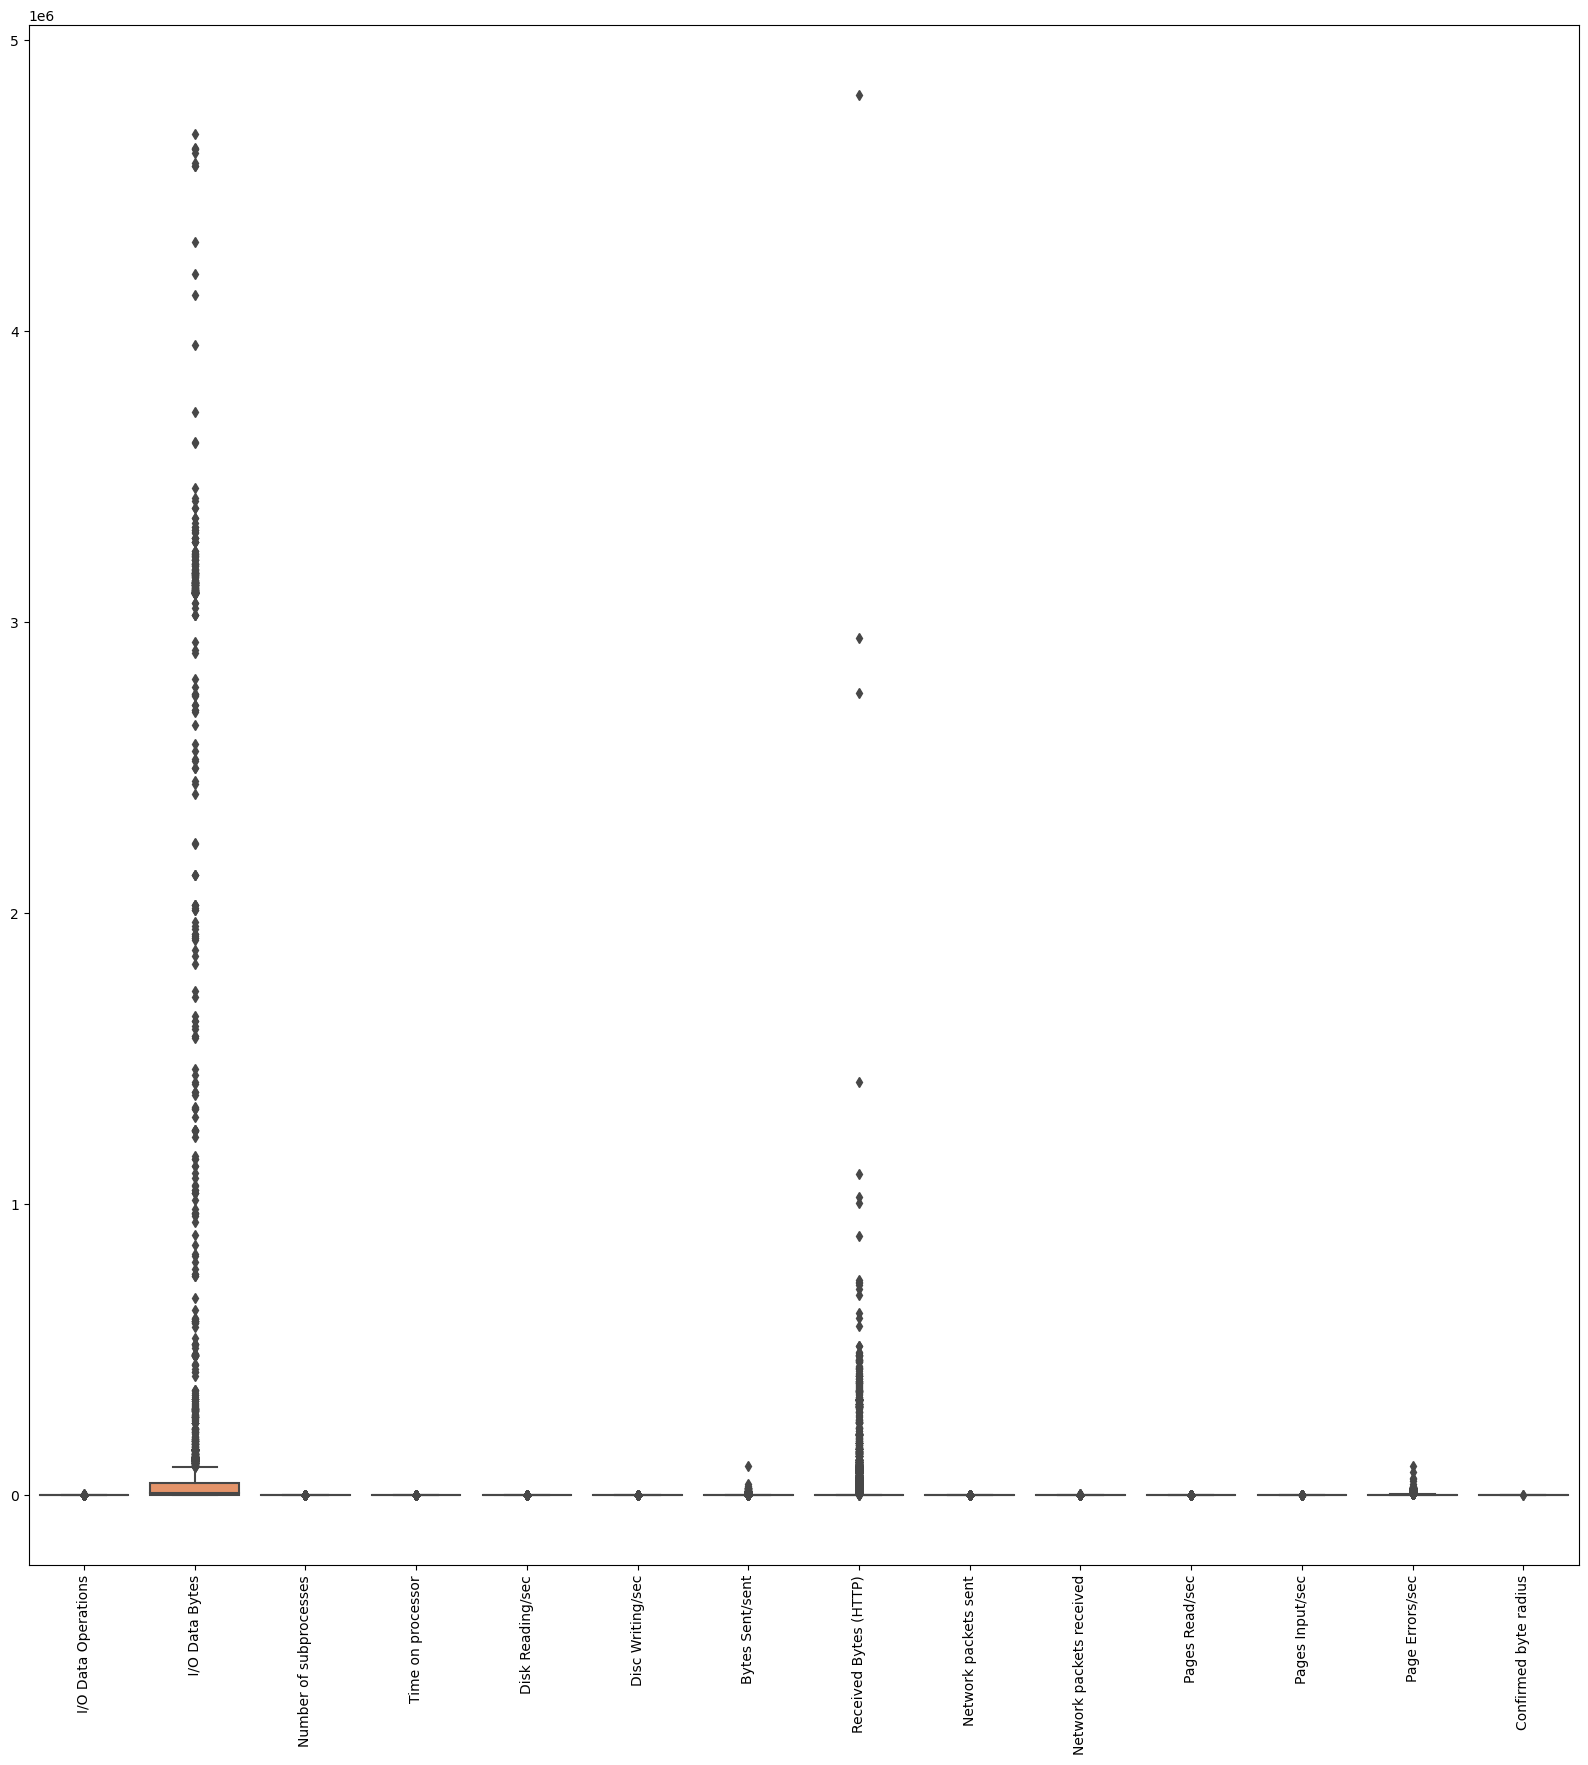

In [13]:
# Outliers
plt.figure(figsize=(20,20))
sns.boxplot(data=train[relevant_features])
plt.xticks(rotation = "vertical");

<AxesSubplot:xlabel='Received Bytes (HTTP)', ylabel='Density'>

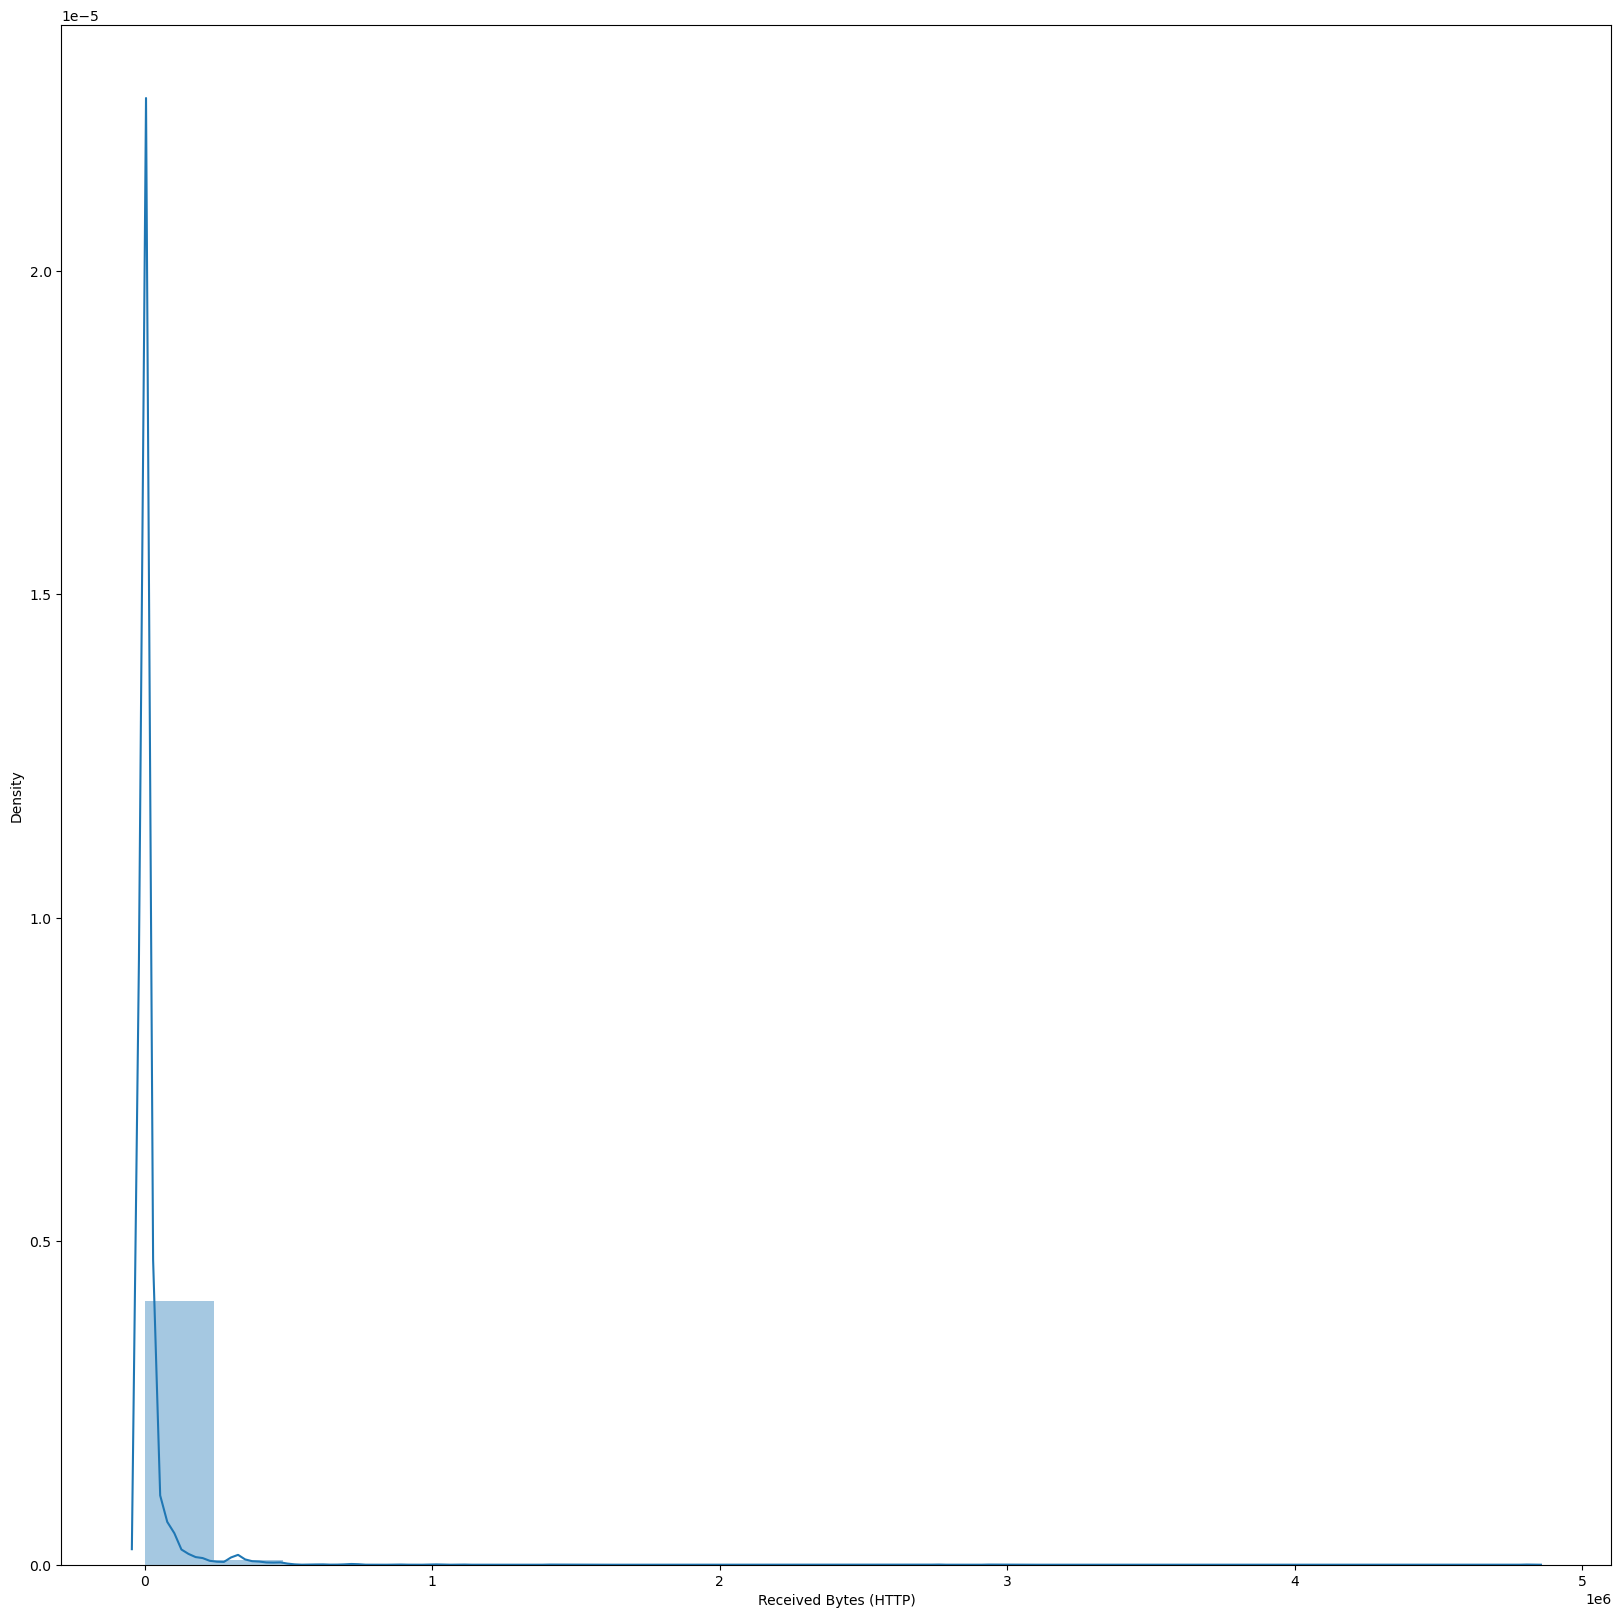

In [14]:
# We see two columns have several outliers
# Let's check the distribution of the columns
plt.figure(figsize=(20,20))
sns.distplot(train["Received Bytes (HTTP)"], bins=20)

<AxesSubplot:xlabel=' I/O Data Bytes', ylabel='Density'>

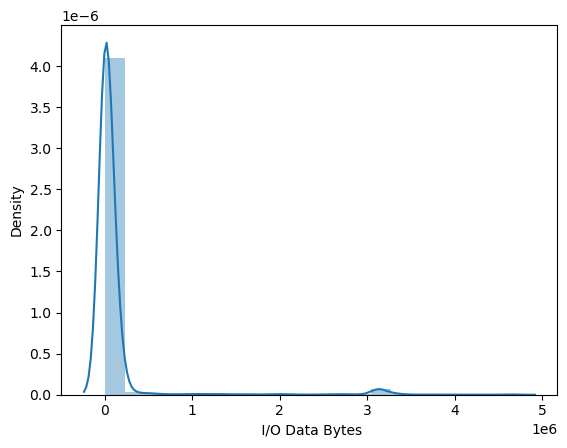

In [15]:
sns.distplot(train[" I/O Data Bytes"], bins=20)

### Insights -
* Received Bytes (HTTP) has several outliers and we'll need to treat them.

<AxesSubplot:>

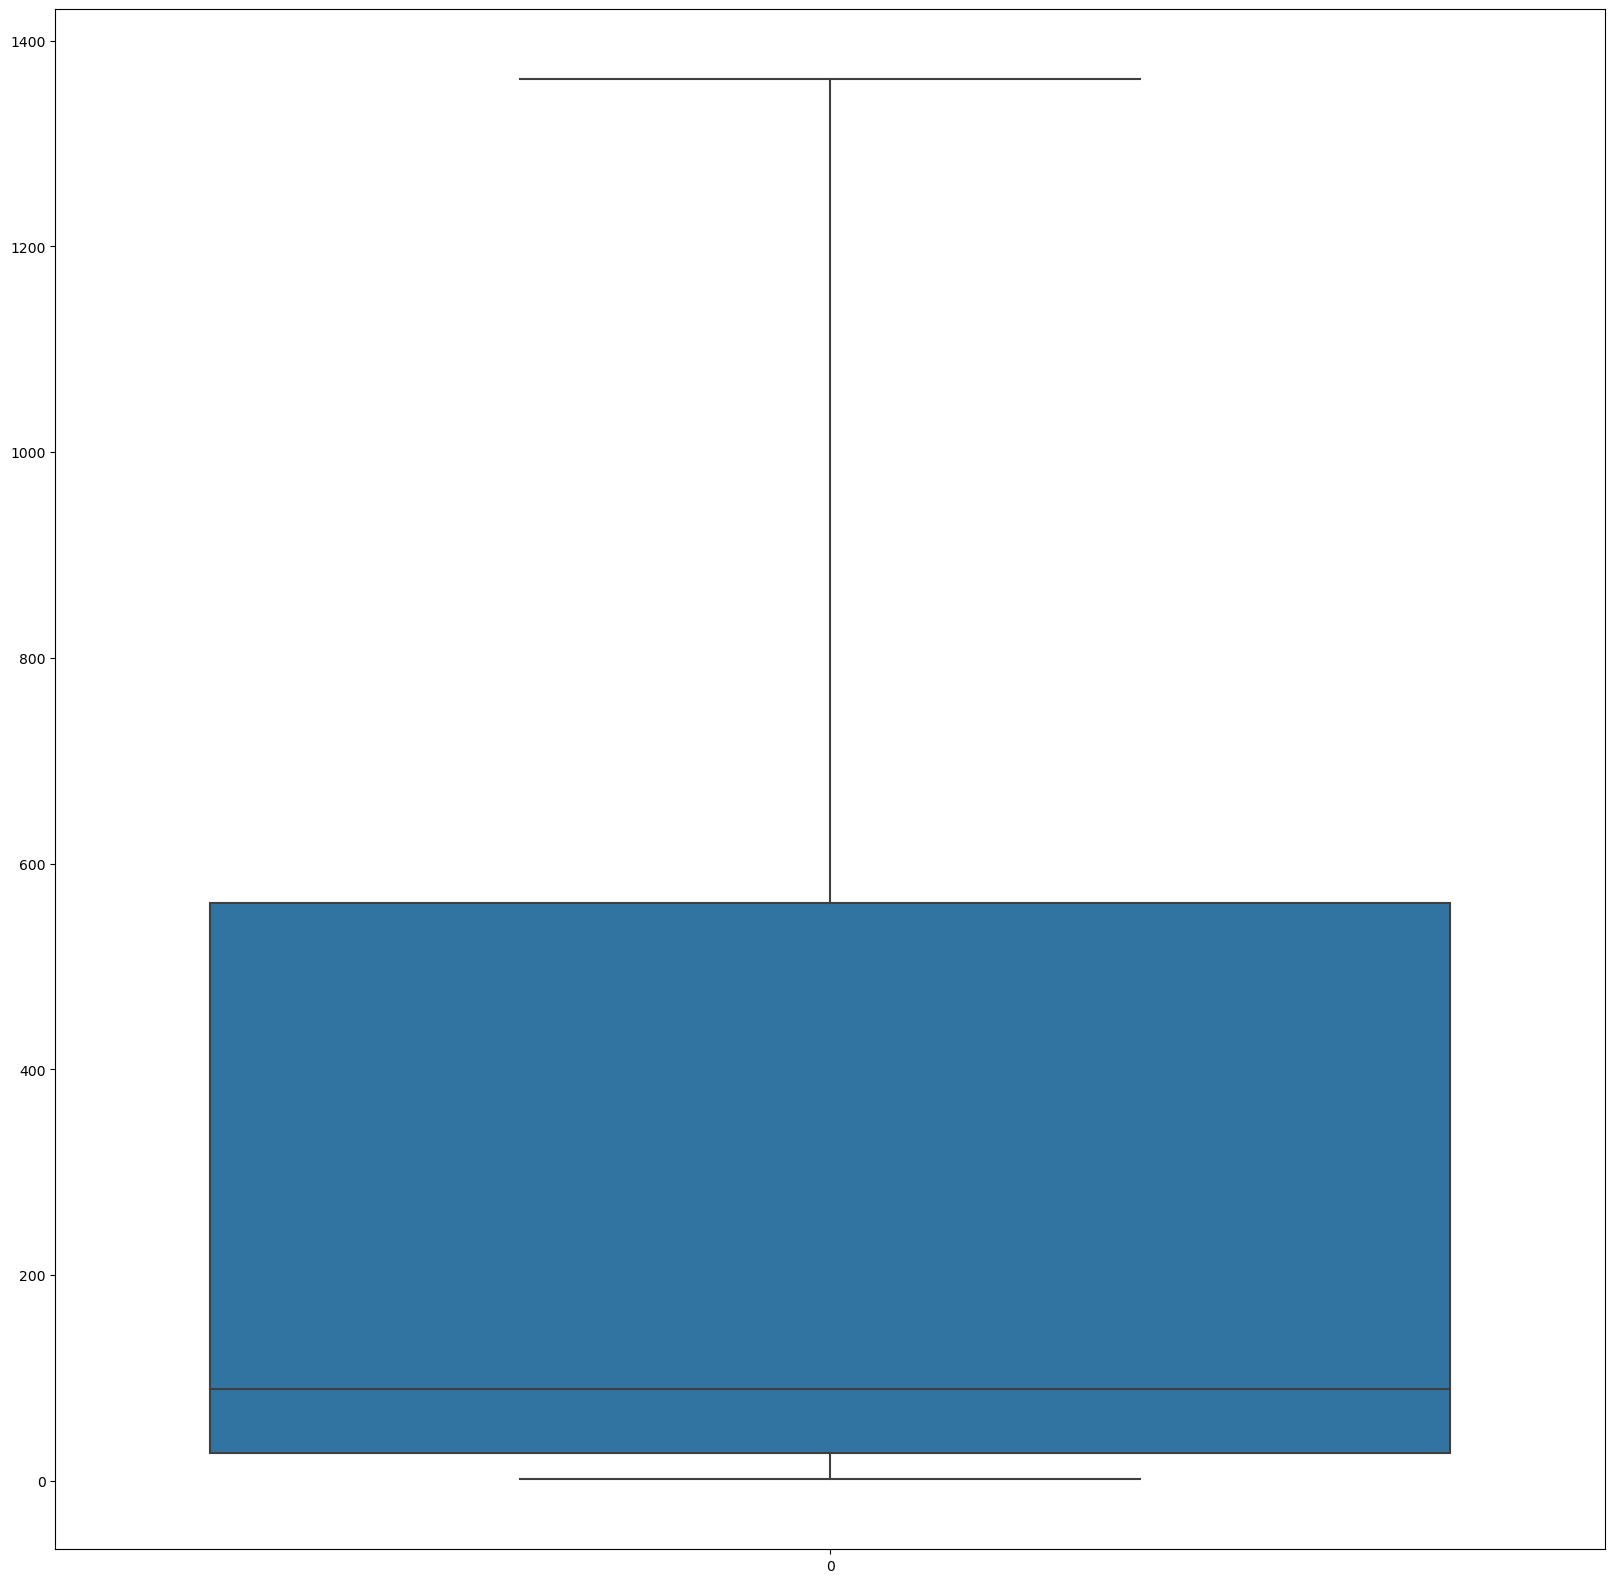

In [16]:
# Outlier treatment
# Received Bytes (HTTP)
q1 = train["Received Bytes (HTTP)"].quantile(0.25)
q3 = train["Received Bytes (HTTP)"].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
train["Received Bytes (HTTP)"] = np.where(train["Received Bytes (HTTP)"] > upper_limit, upper_limit, train["Received Bytes (HTTP)"])
train["Received Bytes (HTTP)"] = np.where(train["Received Bytes (HTTP)"] < lower_limit, lower_limit, train["Received Bytes (HTTP)"])

# Plot the boxplot
plt.figure(figsize=(20,20))
sns.boxplot(data=train["Received Bytes (HTTP)"])

In [17]:
# I/O Data Bytes
q1 = train[" I/O Data Bytes"].quantile(0.25)
q3 = train[" I/O Data Bytes"].quantile(0.75)

iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
train[" I/O Data Bytes"] = np.where(train[" I/O Data Bytes"] > upper_limit, upper_limit, train[" I/O Data Bytes"])
train[" I/O Data Bytes"] = np.where(train[" I/O Data Bytes"] < lower_limit, lower_limit, train[" I/O Data Bytes"])

<AxesSubplot:>

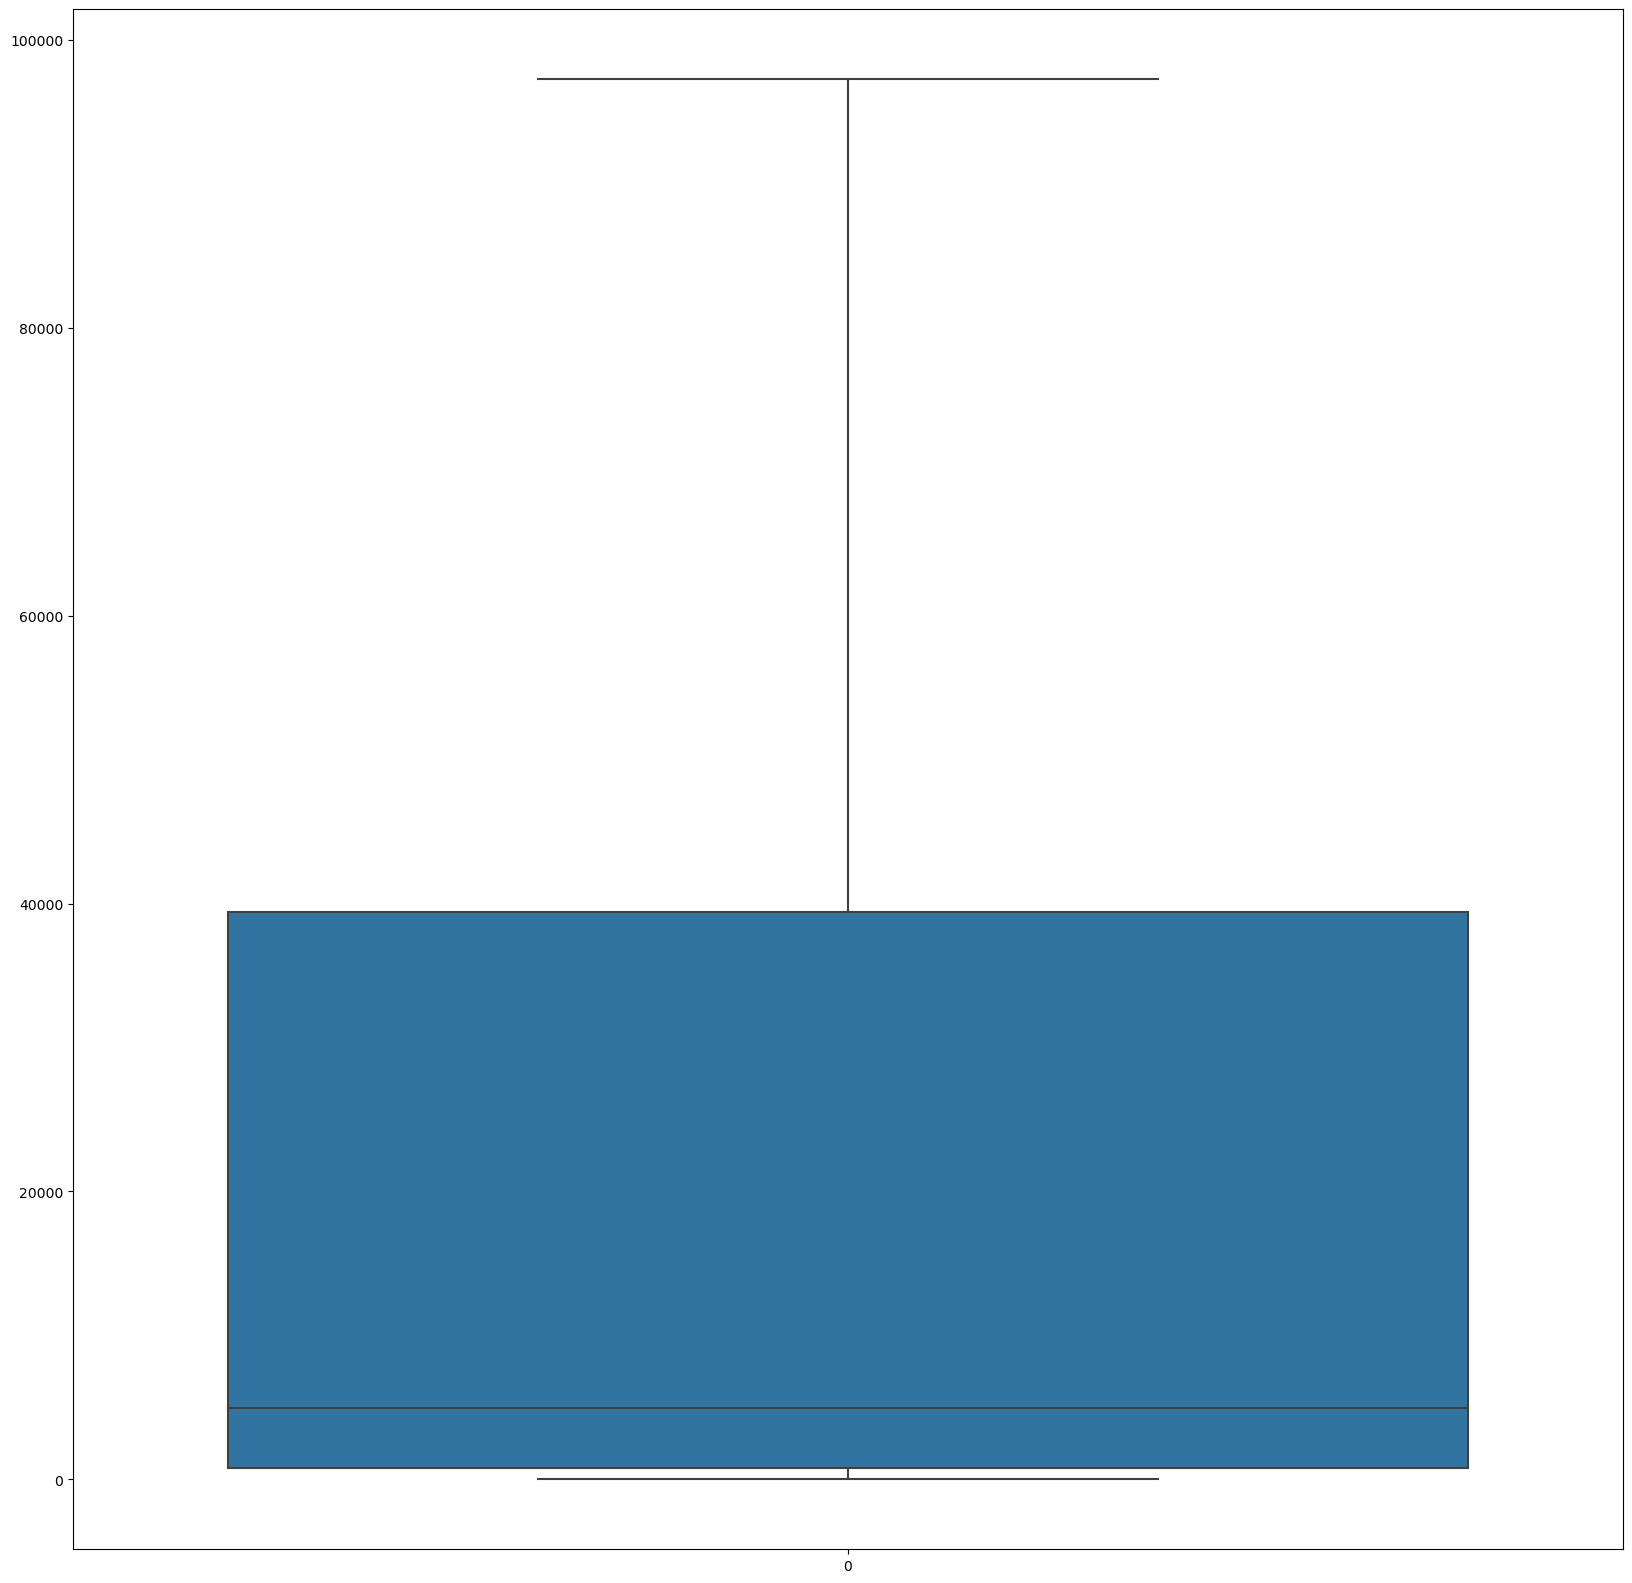

In [18]:
# Plot the boxplot
plt.figure(figsize=(20,20))
sns.boxplot(data=train[" I/O Data Bytes"])

<AxesSubplot:>

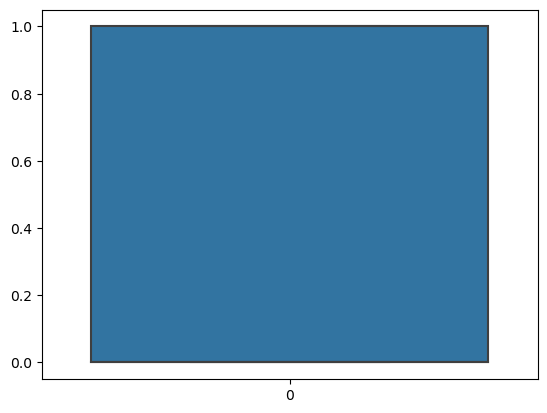

In [19]:
# Label outliers
sns.boxplot(train["Label"])

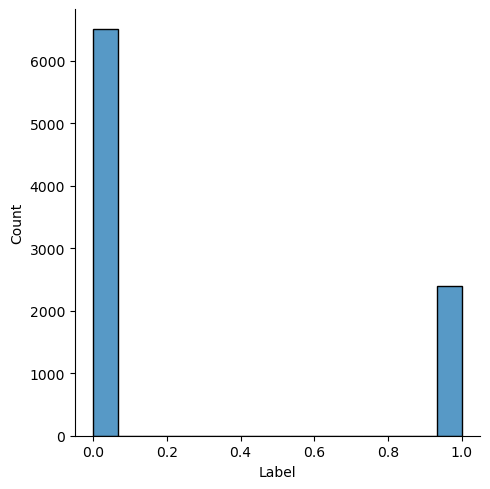

In [20]:
# Histplot of target
sns.displot(train["Label"])

# Modelling

In [21]:
X = train[relevant_features]
y = train['Label']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Feature Scaling ie Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit(X_test)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2074,   32],
       [ 101,  733]])

<AxesSubplot:>

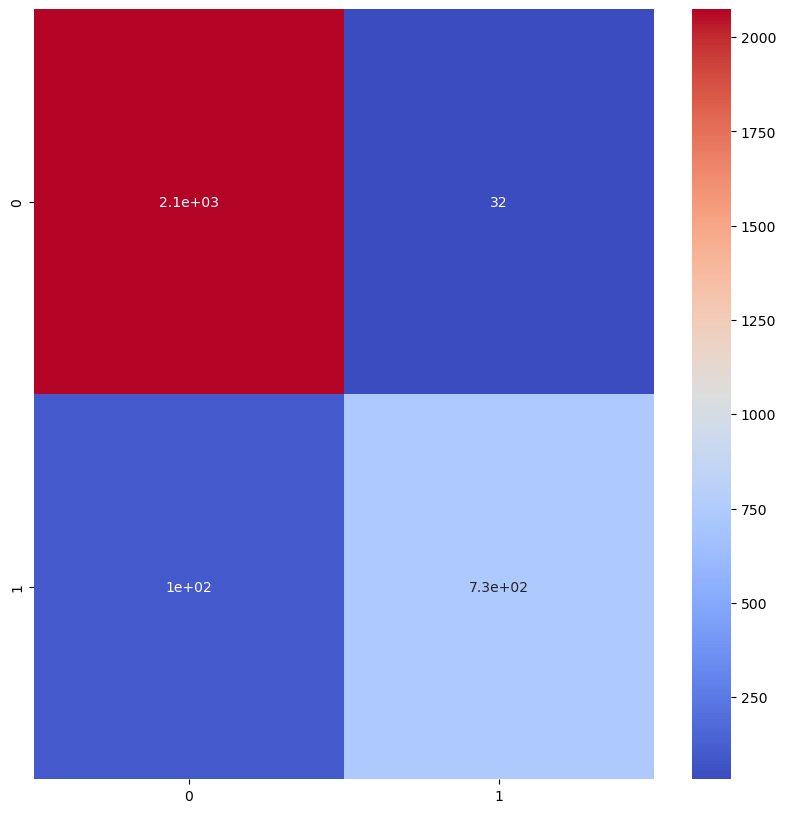

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='coolwarm')

### Insights -
* From the confusion matrix, we can deduce the following:
1. True Positives = 1.2e + 03

In [23]:
# Evaluate 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("The F1 score is ", f1_score(y_pred, y_test))

The F1 score is  0.91682301438399


The F1 score refers to the 

In [24]:
print("The accuracy is ", accuracy_score(y_pred, y_test))

The accuracy is  0.9547619047619048


In [25]:
sample.head()

,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


In [26]:
test.isna().any()

ID                          False
I/O Data Operations         False
 I/O Data Bytes             False
Number of subprocesses      False
Time on processor           False
Disk Reading/sec            False
Disc Writing/sec            False
Bytes Sent/sent             False
Received Bytes (HTTP)       False
Network packets sent        False
Network packets received    False
Pages Read/sec              False
Pages Input/sec             False
Page Errors/sec             False
Confirmed byte radius       False
dtype: bool

In [27]:
# Create submission
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['Label'] = classifier.predict(test[relevant_features])
submission.to_csv('sub_rf.csv', index=False)

The F1 score is  0.91682301438399
The accuracy score is  0.9547619047619048


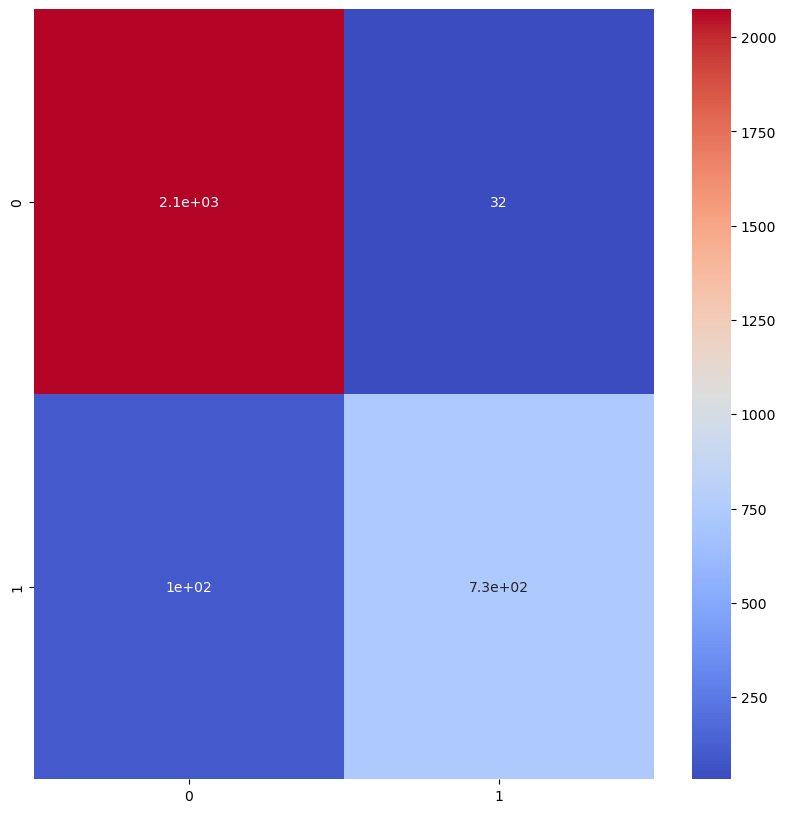

In [28]:
# Logistic Reg
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

# Predicting the Test set results
lr_y_pred = classifier.predict(X_test)
lr_y_pred

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(lr_cm, annot=True, cmap='coolwarm')

# Evaluate
print("The F1 score is ", f1_score(lr_y_pred, y_test))
print("The accuracy score is ", accuracy_score(lr_y_pred, y_test))

In [29]:
lr_cm, lr_y_pred

(array([[2074,   32],
        [ 101,  733]]),
 array([0, 0, 0, ..., 0, 0, 0]))

[0 0 0 ... 0 0 0]
[[2087   19]
 [  57  777]]
The F1 score is  0.9533742331288344


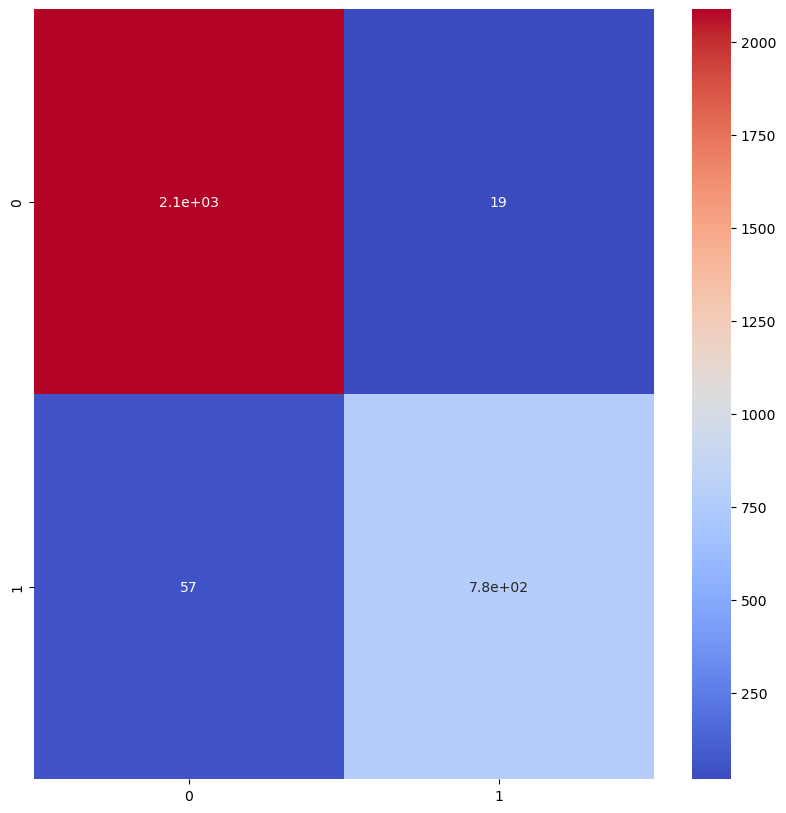

In [30]:
# XGBoost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1, n_estimators=10000, max_depth=15, learning_rate=0.1,subsample=0.9,colsample_bytree=1.0,objective='binary:logistic',min_child_weight=1,nthread=100, predictor="auto", booster="gbtree")
xgb.fit(X_train, y_train)

# Predicting the Test set results
xgb_y_pred = xgb.predict(X_test)
print(xgb_y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
print(xgb_cm)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(xgb_cm, annot=True, cmap='coolwarm')

# Evaluate
print("The F1 score is ", f1_score(xgb_y_pred, y_test))



In [31]:
print("The Accuracy score is: ",accuracy_score(xgb_y_pred, y_test))

The Accuracy score is:  0.9741496598639455


In [32]:
# Create submission
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['Label'] = xgb.predict(test[relevant_features])
submission.to_csv('sub_xgboost2.csv', index=False)

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2106
           1       0.90      0.85      0.88       834

    accuracy                           0.93      2940
   macro avg       0.92      0.91      0.92      2940
weighted avg       0.93      0.93      0.93      2940

The F1 score is  0.8779284833538841


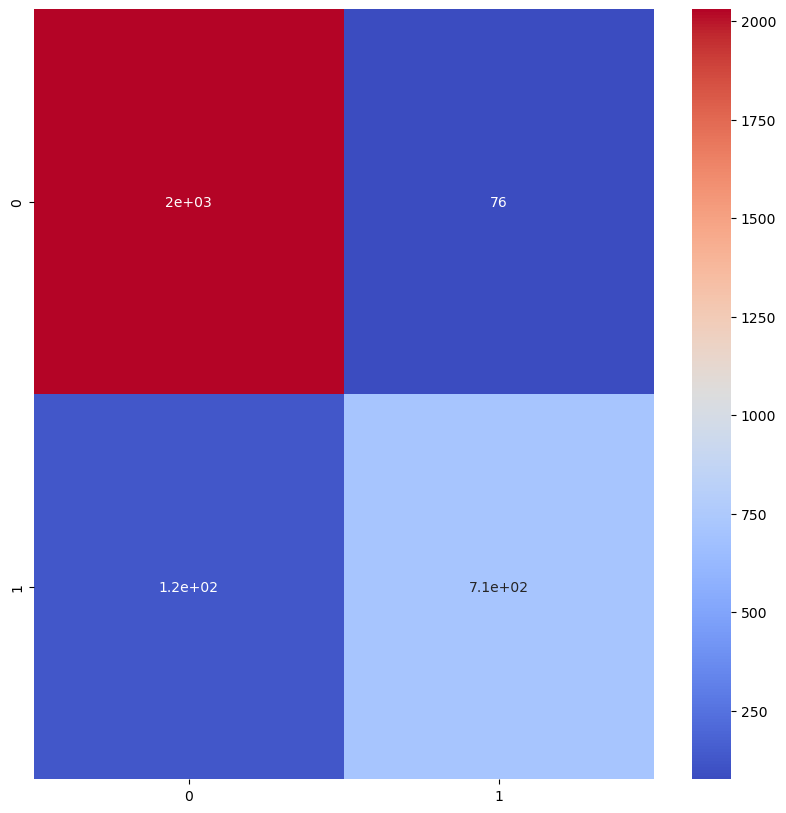

In [33]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(X_train, y_train)

#Predict the test results
dtree_pred = dtree.predict(X_test)
print(dtree_pred)

#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
dtree_cm = (confusion_matrix(y_test, dtree_pred))

print(classification_report(y_test, dtree_pred))

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(dtree_cm, annot=True, cmap='coolwarm')

# Evaluate
print("The F1 score is ", f1_score(dtree_pred, y_test))

In [34]:
print("The Accuracy score is: ",accuracy_score(dtree_pred, y_test))

The Accuracy score is:  0.9326530612244898


**Remodelling**

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100000,n_features=10, n_redundant=0, n_informative=8,random_state=1)
import pandas as pd
X = train[relevant_features]
y = train['Label']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


In [36]:
from xgboost import XGBClassifier
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
classification = XGBClassifier(**params)

In [37]:
classification.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [38]:
from sklearn.metrics import classification_report
predictions = classification.predict(X_test)

print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2189
           1       0.84      0.93      0.89       751

    accuracy                           0.94      2940
   macro avg       0.91      0.94      0.92      2940
weighted avg       0.94      0.94      0.94      2940



In [39]:
# Evaluate
print("The F1 score is ", f1_score(predictions, y_test))
print("The Accuracy score is: ",accuracy_score(predictions, y_test))

The F1 score is  0.8858044164037855
The Accuracy score is:  0.9384353741496598


In [40]:
# The model is still performing poorly since our metric is F1_score
# We need to do more feature engineering and hyperparameter tuning
# I will be doing that in the next version of this notebook

# Feature engineering
# We can create new features from the existing features eg
# 1. Total Bytes
# 2. Total Bytes per second
# 3. Total Bytes per minute
# 4. Total Bytes per hour
